In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/jeju_card.csv')
df.head()

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     19573 non-null  object
 1   시군구명    19573 non-null  object
 2   지역구분    19573 non-null  object
 3   업종명     19573 non-null  object
 4   이용자 구분  19573 non-null  object
 5   연령대     19573 non-null  object
 6   성별      19573 non-null  object
 7   연월      19573 non-null  object
 8   이용자수    19573 non-null  int64 
 9   이용횟수    19573 non-null  int64 
 10  이용금액    19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


In [5]:
df.dtypes

시도명       object
시군구명      object
지역구분      object
업종명       object
이용자 구분    object
연령대       object
성별        object
연월        object
이용자수       int64
이용횟수       int64
이용금액       int64
dtype: object

In [6]:
df.describe()
# object 까지 보려면 describe(include='all')

,이용자수,이용횟수,이용금액
count,19573.000000,19573.000000,1.957300e+04
mean,2987.681347,5980.462525,2.100849e+08
std,5331.172895,13623.951410,3.921408e+08
min,1.000000,1.000000,1.000000e+03
25%,254.000000,371.000000,1.765947e+07
50%,972.000000,1376.000000,7.142090e+07
75%,3169.000000,5710.000000,2.169743e+08
max,40329.000000,149274.000000,3.213235e+09


In [7]:
df.isna().sum()

시도명       0
시군구명      0
지역구분      0
업종명       0
이용자 구분    0
연령대       0
성별        0
연월        0
이용자수      0
이용횟수      0
이용금액      0
dtype: int64

In [8]:
df['년도'] = df['연월'].str.split('-', expand=True)[0]
df['월'] = df['연월'].str.split('-', expand=True)[1]

In [9]:
df.head()

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,년도,월
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100,2018,12
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000,2018,12
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000,2018,12
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500,2018,12
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600,2018,12


### 정수형 데이터만 groupby 해서 계산할때

In [32]:
df.groupby('연월').sum(numeric_only=True)

,이용자수,이용횟수,이용금액
연월,,,
2016-09,2094493,4057620,149999299193
2016-10,2106735,4164352,155825354760
2016-11,1964407,3891649,150375588952
2016-12,2043738,4067917,158975465057
2017-01,2044697,3962878,158062633602
2017-02,1937989,3686906,142673272629
2017-03,2139087,4265024,158170622304
2017-04,2261037,4428571,164145266282
2017-05,2422539,4744952,174450463090


### 2017, 2018년도

In [10]:
# 2017년과 2018년도만
df_1 = df[(df['년도']=='2017') | (df['년도']=='2018')]
df_1.head()

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,년도,월
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100,2018,12
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000,2018,12
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000,2018,12
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500,2018,12
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600,2018,12


In [11]:
# 2017년과 2018년 두 연도 사이에 어떤 차이가 있나요?
# 이용자수
df_1_pivot = df_1.pivot_table(values='이용자수',
                          index='월',
                          columns='년도',
                          aggfunc='count')
df_1_pivot

년도,2017,2018
월,,
01,719,668
02,722,670
03,729,669
04,728,667
05,730,669
06,728,666
07,727,670
08,737,669
09,734,665


In [12]:
# 이용금액
df_2_pivot = df_1.pivot_table(values='이용금액',
                          index='월',
                          columns='년도',
                          aggfunc='sum')
df_2_pivot

년도,2017,2018
월,,
01,158062633602,124526581076
02,142673272629,110731027342
03,158170622304,125135988754
04,164145266282,132204247821
05,174450463090,137375672338
06,166023890619,131776008635
07,177270011408,135229618598
08,178853518885,142897760980
09,168355520204,133242069909


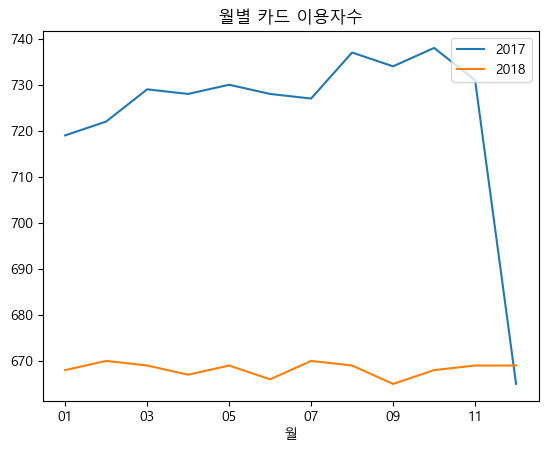

In [13]:
plt.rc('font', family='Malgun Gothic', size=10)
# plt.plot(df_1_pivot)
df_1_pivot.plot()
plt.title('월별 카드 이용자수')
plt.legend(loc="upper right")
plt.show()

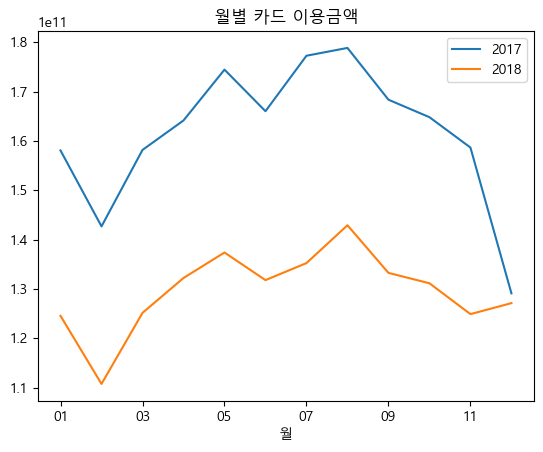

In [14]:
plt.rc('font', family='Malgun Gothic', size=10)
# plt.plot(df_1_pivot)
df_2_pivot.plot()
plt.title('월별 카드 이용금액')
plt.legend(loc="upper right")
plt.show()

### 연령대 데이터 전처리

In [30]:
df['연령대'].unique()

array(['60대이상', '50대', '40대', '30대', '20대미만', '20대'], dtype=object)

In [15]:
object_columns = df.columns[df.dtypes=='object']
object_columns

# unique()
for col in object_columns:
    print(col)
    print(df[col].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09'] 

년도
['2018' '2017' '2016'] 

월
['12' '11' '10' '09' '08' '07' '06' '05' '04' '03' '02' '01'] 



In [16]:
df[df['연령대']=='20 미만'] = df[df['연령대']=='20 미만'].replace('20 미만','20대미만')

In [33]:
df['연령대'] = pd.Categorical(df['연령대'],
                                      categories=['20대미만', '20대', '30대', '40대', '50대', '60대이상'],
                                      ordered=True)

### 연령대별 이용자수, 소비금액,  1회당 소비금액

In [18]:
df_age_pivot = df.pivot_table(values='이용자수',
                          index='연령대',
                          columns='년도',
                          aggfunc='count')
df_age_pivot

년도,2016,2017,2018
연령대,,,
20대,512,1520,1344
20대미만,306,1092,1299
30대,512,1520,1344
40대,512,1520,1344
50대,512,1520,1344
60대이상,512,1516,1344


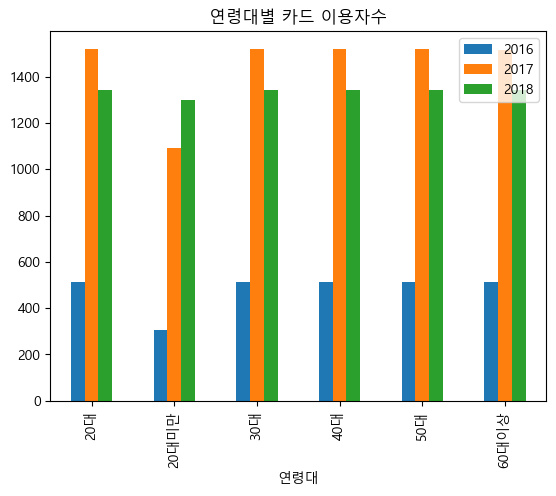

In [19]:
plt.rc('font', family='Malgun Gothic', size=10)
# plt.plot(df_1_pivot)
df_age_pivot.plot(kind='bar')
plt.title('연령대별 카드 이용자수')
plt.legend(loc="upper right")
plt.show()

In [20]:
df_age2_pivot = df.pivot_table(values='이용금액',
                          index='연령대',
                          columns='년도',
                          aggfunc='sum')
df_age2_pivot

년도,2016,2017,2018
연령대,,,
20대,55552344281,208175160124,175770246392
20대미만,955390823,4996657612,5027234286
30대,137541642085,437721213544,320955678476
40대,180259782156,561248406540,442123304148
50대,153065943315,468286978356,387615338975
60대이상,87800605302,260136246561,224759157547


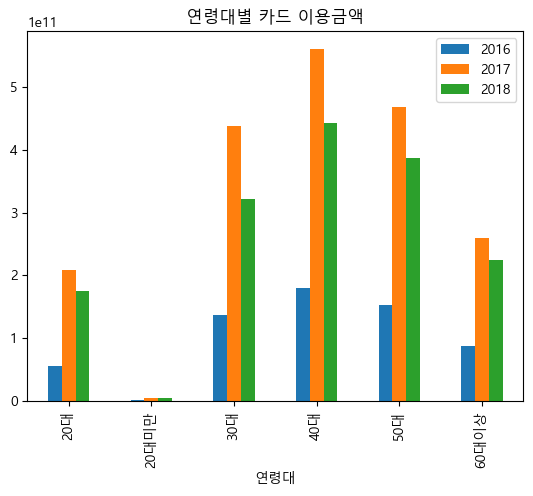

In [21]:
plt.rc('font', family='Malgun Gothic', size=10)
# plt.plot(df_1_pivot)
df_age2_pivot.plot(kind='bar')
plt.title('연령대별 카드 이용금액')
plt.legend(loc="upper right")
plt.show()

### 연령대별 어떤 업종에 많은 금액을 지출하는지

In [22]:
df_age3_pivot = df.pivot_table(values='이용금액',
                          index='연령대',
                          columns='업종명',
                          aggfunc='sum')
df_age3_pivot

업종명,교통,기타,문화/레져,소매,쇼핑,숙박,식음료,유흥
연령대,,,,,,,,
20대,50777303082,40408198963,13989910881,43251611596,116233176506,14559221261,145975128333,14303200175
20대미만,298994026,636195948,854384435,1846763044,3296620542,115961096,3777289485,153074145
30대,106209551266,123685346487,26200478491,83572530585,239825801701,39800692198,247310158726,29613974651
40대,135182102715,147654761783,47639408567,127319893152,321264762378,43805549384,300834634745,59930380120
50대,124499468075,114873665581,45643559305,134174733605,265587316728,33557965348,243391773443,47239778561
60대이상,83691113114,70762816321,25489642899,91493594742,149565832505,19984932731,117792830678,13915246420


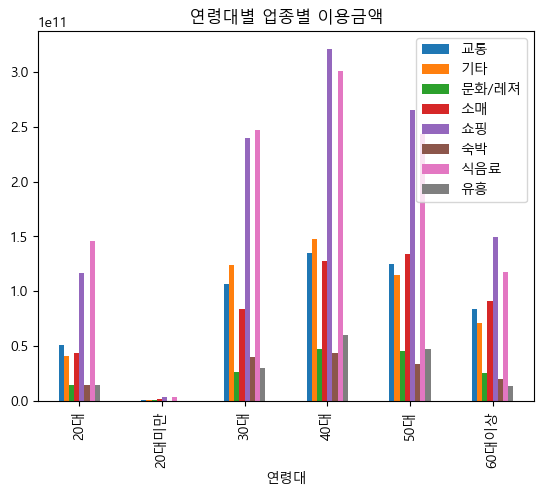

In [23]:
plt.rc('font', family='Malgun Gothic', size=10)
# plt.plot(df_1_pivot)
df_age3_pivot.plot(kind='bar')
plt.title('연령대별 업종별 이용금액')
plt.legend(loc="upper right")
plt.show()

### 연령대별 연월별 카드 이용 추이

In [24]:
df_2016 = df[df['년도']=='2016']
df_2017 = df[df['년도']=='2017']
df_2018 = df[df['년도']=='2018']

In [25]:
df_age4_pivot = df_2016.pivot_table(values='이용횟수',
                          index='연령대',
                          columns='월',
                          aggfunc='sum')
df_age4_pivot

월,09,10,11,12
연령대,,,,
20대,657682,639840,605737,646244
20대미만,20819,25984,18700,19650
30대,1111829,1094375,990500,1042877
40대,1097546,1159242,1082750,1135701
50대,769995,824904,792447,813832
60대이상,399749,420007,401515,409613


In [26]:
df_age5_pivot = df_2017.pivot_table(values='이용횟수',
                          index='연령대',
                          columns='월',
                          aggfunc='sum')
df_age5_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
연령대,,,,,,,,,,,,
20대,646349,661122,728757,737023,792863,827704,963277,995836,853856,756116,720797,620414
20대미만,22005,25763,31592,38257,42762,34576,36934,38494,45218,48201,44188,21906
30대,986712,911139,1108127,1164181,1241479,1190931,1281166,1333749,1265008,1125277,1026813,864631
40대,1123888,1027428,1136288,1191651,1292999,1233917,1375449,1432573,1250128,1218923,1143532,988154
50대,804313,723801,839832,858543,916341,881088,946995,958064,899239,873646,848477,763920
60대이상,379611,337653,420428,438916,458508,438386,444357,453673,451710,431450,427321,387465


In [27]:
df_age6_pivot = df_2018.pivot_table(values='이용횟수',
                          index='연령대',
                          columns='월',
                          aggfunc='sum')
df_age6_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
연령대,,,,,,,,,,,,
20대,646432,624802,695267,684735,709903,766452,863860,890935,754078,711784,666791,699097
20대미만,25348,23795,33521,40715,51912,35364,38064,40327,44385,55125,44183,42497
30대,834728,718773,910365,955053,1000432,1031661,1045933,1132722,1020849,973858,873858,874588
40대,1020333,860755,988660,1041410,1134895,1129050,1190088,1299376,1104994,1102496,1030035,1022940
50대,773027,651464,763081,807222,840374,823927,853732,884696,808732,808611,776547,765968
60대이상,360499,316416,391031,420697,429893,417388,416544,431089,415272,412289,398300,388142


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


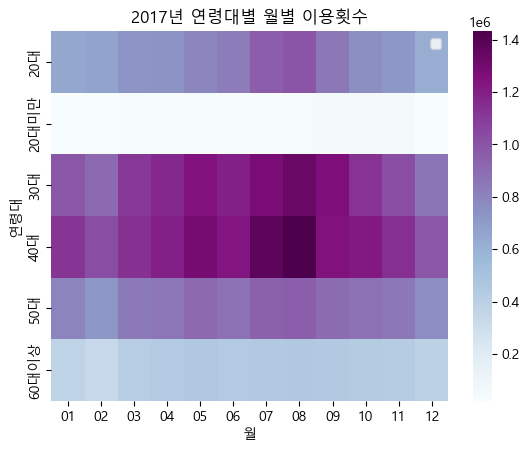

In [28]:
plt.rc('font', family='Malgun Gothic', size=10)
# plt.plot(df_1_pivot)
# df_age5_pivot.plot(kind='bar')
sns.heatmap(df_age5_pivot, cmap='BuPu')
plt.title('2017년 연령대별 월별 이용횟수')
plt.legend(loc="upper right")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


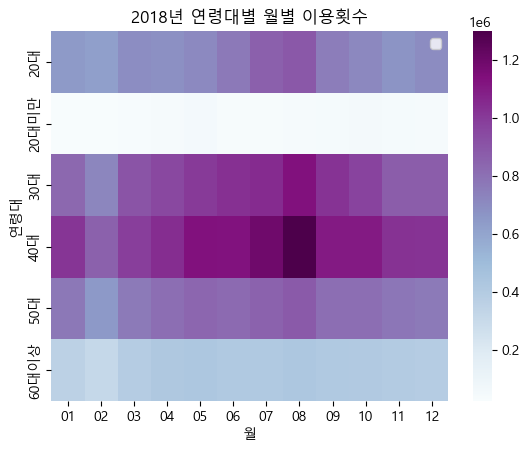

In [29]:
plt.rc('font', family='Malgun Gothic', size=10)
# plt.plot(df_1_pivot)
# df_age4_pivot.plot(kind='bar')
sns.heatmap(df_age6_pivot, cmap='BuPu')
plt.title('2018년 연령대별 월별 이용횟수')
plt.legend(loc="upper right")
plt.show()